# Imports

In [89]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import itertools
import collections
import queue
import scipy.io as spio

# Função aLabel

In [90]:
def aLabel(X, centers):
    dist = np.array([[np.sqrt(np.square(x[0]-y[0]) + np.square(x[1]-y[1])) for x in centers] for y in X])
    
    mins = np.array([m.min() for m in dist]).T

    labs = np.array([np.where(mins[i] == dist[i]) for i in range(len(mins))]).T

    return labs[0][0]

# K-means

In [91]:

def Kmeans(X, n_clusters):
    # 1. Randomly choose clusters
    solving = True 
    rng = np.random.RandomState(2)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while solving:
        # 2a. Assign labels based on closest center
        labels = aLabel(X, centers)
        
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            solving = False
        centers = new_centers
    
    return centers, labels

# Lendo cluster.dat

In [92]:
with open('cluster.dat') as f:
    lines = f.readlines()
    xy = np.array([[float(line.split()[0])*0.01,float(line.split()[1])] for line in lines])

# Plotando cluster.dat

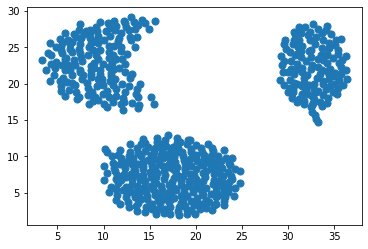

In [93]:
Points = xy
plt.scatter(Points[:, 0], Points[:, 1], s=50)

# Kmeans no cluster.dat

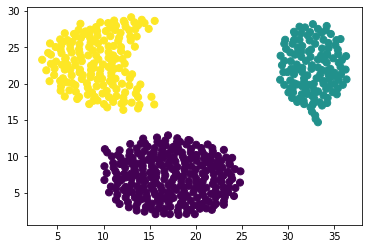

In [94]:
centers, labels = Kmeans(Points, 3)
plt.scatter(Points[:, 0], Points[:, 1], c=labels,s=50, cmap='viridis')

# Método Cotovelo

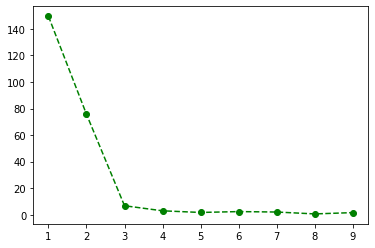

In [95]:
temp_epsilon = []
num_cluster = range(1,10)
for k in num_cluster:
    centers, labels = Kmeans(Points, k)  
    for p in range(k):
        n=0
        for x in centers: 
            z=0
            for i in range(len(labels)):
                if labels[i] == p:
                    z += np.square(Points[i][0] - x[0]) + np.square(Points[i][1] - x[1])
                    n+=1   
    temp_epsilon.append(z/n)


plt.plot(num_cluster,temp_epsilon,"go--")
plt.show()

# Função para encontrar pontos vizinhos

In [96]:
def neighbor_points(data, pointId, radius):
    points = []
    for i in range(len(data)):
        if np.linalg.norm(data[i] - data[pointId]) <= radius:
            points.append(i)
    return points

# Implementação DBScan

In [97]:

core = -1
edge = -2

def DBScan(dataSet, radius, minPt):

    
    pointLabel  = [0] * len(dataSet)
    pointCount = []
    corePoint=[]
    nonCore=[]
    
    for i in range(len(dataSet)):
        pointCount.append(neighbor_points(Points,i,radius))
    
    for i in range(len(pointCount)):
        if (len(pointCount[i])>=minPt):
            pointLabel[i]=core
            corePoint.append(i)
        else:
            nonCore.append(i)

    for i in nonCore:
        for j in pointCount[i]:
            if j in corePoint:
                pointLabel[i]=edge
                break
            
    cluster = 1
    for i in range(len(pointLabel)):
        q = queue.Queue()
        if (pointLabel[i] == core):
            pointLabel[i] = cluster
            for x in pointCount[i]:
                if(pointLabel[x]==core):
                    q.put(x)
                    pointLabel[x]=cluster
                elif(pointLabel[x]==edge):
                    pointLabel[x]=cluster 
            while not q.empty():
                neighbors = pointCount[q.get()]
                for y in neighbors:
                    if (pointLabel[y]==core):
                        pointLabel[y]=cluster
                        q.put(y)
                    if (pointLabel[y]==edge):
                        pointLabel[y]=cluster            
            cluster+=1
           
    return pointLabel,cl

# Função para plotar DBScan bonito

In [98]:
def plotRes(data, clusterRes, clusterNum):
    nPoints = len(data)
    scatterColors = ['black', 'green', 'brown', 'red', 'purple', 'orange', 'yellow']
    for i in range(clusterNum):
        if (i==0):
            color='blue'
        else:
            color = scatterColors[i % len(scatterColors)]
        x1 = [];  y1 = []
        for j in range(nPoints):
            if clusterRes[j] == i:
                x1.append(data[j, 0])
                y1.append(data[j, 1])
        plt.scatter(x1, y1, c=color, alpha=1, marker='.')

# Vários DBScan rodando

Set eps = 0, Minpoints = 0


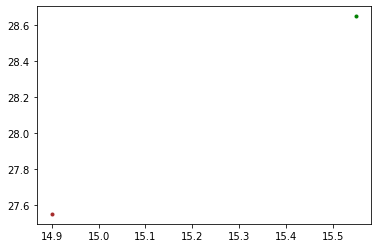

number of cluster found: 2
Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 

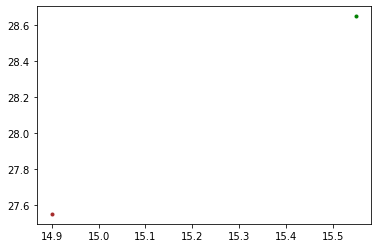

number of cluster found: 2
Counter({1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1, 33: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 62: 1, 63: 1, 64: 1, 65: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 74: 1, 75: 1, 76: 1, 77: 1, 78: 1, 79: 1, 80: 1, 81: 1, 82: 1, 83: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 100: 1, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 1, 108: 1, 109: 1, 110: 1, 111: 1, 112: 1, 113: 1, 114: 1, 115: 1, 116: 1, 117: 1, 118: 1, 119: 1, 120: 1, 121: 1, 122: 1, 123: 1, 124: 1, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 1, 131: 1, 132: 1, 133: 1, 134: 1, 

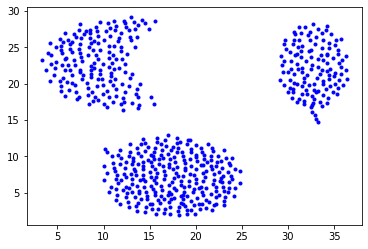

number of cluster found: 2
Counter({0: 573})
number of outliers found: 573

Set eps = 0, Minpoints = 3


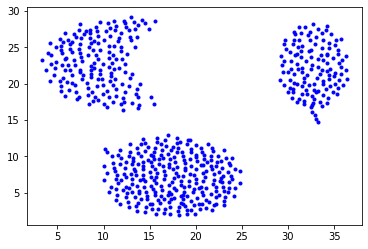

number of cluster found: 2
Counter({0: 573})
number of outliers found: 573

Set eps = 0, Minpoints = 4


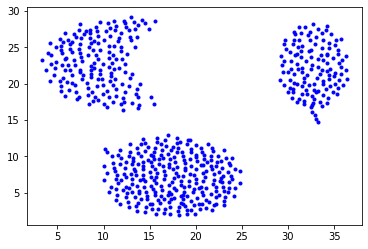

number of cluster found: 2
Counter({0: 573})
number of outliers found: 573

Set eps = 0, Minpoints = 5


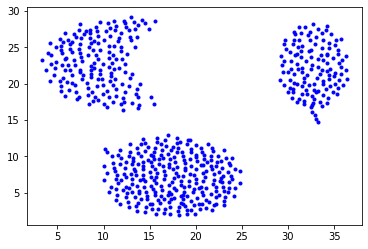

number of cluster found: 2
Counter({0: 573})
number of outliers found: 573

Set eps = 0, Minpoints = 6


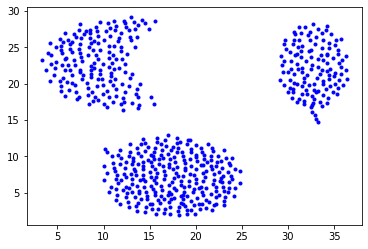

number of cluster found: 2
Counter({0: 573})
number of outliers found: 573

Set eps = 0, Minpoints = 7


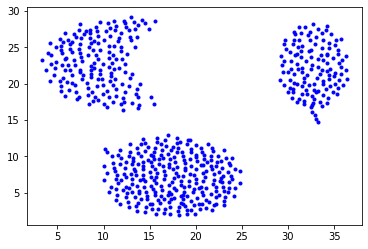

number of cluster found: 2
Counter({0: 573})
number of outliers found: 573

Set eps = 0, Minpoints = 8


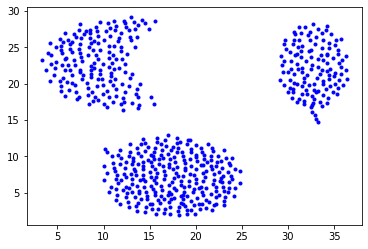

number of cluster found: 2
Counter({0: 573})
number of outliers found: 573

Set eps = 0, Minpoints = 9


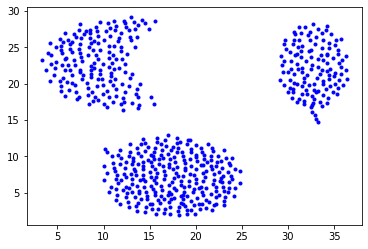

number of cluster found: 2
Counter({0: 573})
number of outliers found: 573

Set eps = 1, Minpoints = 0


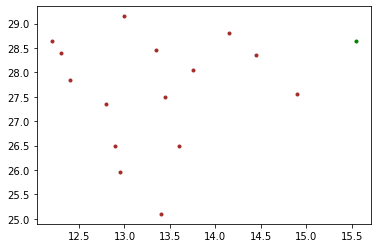

number of cluster found: 2
Counter({8: 272, 3: 149, 10: 130, 2: 15, 4: 2, 1: 1, 5: 1, 6: 1, 7: 1, 9: 1})
number of outliers found: 0

Set eps = 1, Minpoints = 1


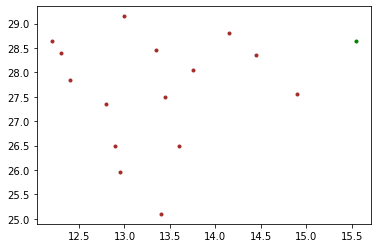

number of cluster found: 2
Counter({8: 272, 3: 149, 10: 130, 2: 15, 4: 2, 1: 1, 5: 1, 6: 1, 7: 1, 9: 1})
number of outliers found: 0

Set eps = 1, Minpoints = 2


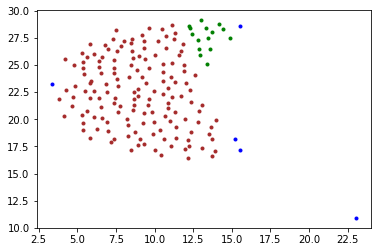

number of cluster found: 2
Counter({4: 272, 2: 149, 5: 130, 1: 15, 0: 5, 3: 2})
number of outliers found: 5

Set eps = 1, Minpoints = 3


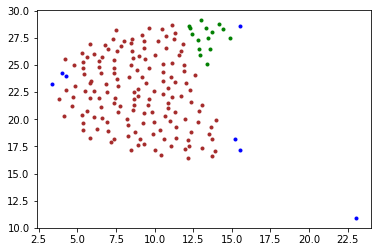

number of cluster found: 2
Counter({3: 272, 2: 149, 4: 130, 1: 15, 0: 7})
number of outliers found: 7

Set eps = 1, Minpoints = 4


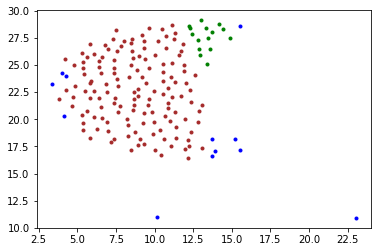

number of cluster found: 2
Counter({4: 271, 2: 142, 5: 128, 1: 15, 0: 12, 3: 3, 6: 2})
number of outliers found: 12

Set eps = 1, Minpoints = 5


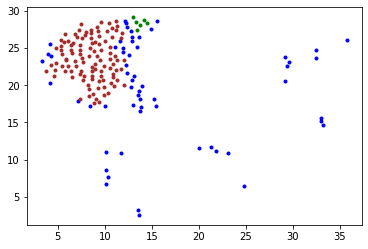

number of cluster found: 2
Counter({5: 261, 2: 107, 6: 71, 0: 59, 7: 31, 8: 18, 3: 10, 4: 10, 1: 6})
number of outliers found: 59

Set eps = 1, Minpoints = 6


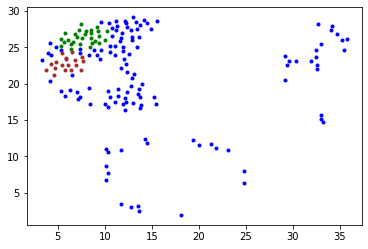

number of cluster found: 2
Counter({7: 253, 0: 125, 8: 60, 1: 28, 3: 22, 2: 18, 12: 18, 11: 15, 9: 8, 10: 8, 4: 6, 5: 6, 6: 6})
number of outliers found: 125

Set eps = 1, Minpoints = 7


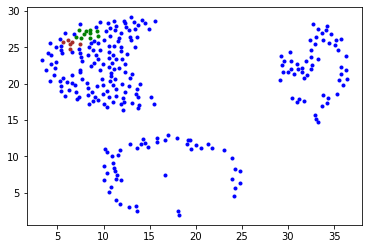

number of cluster found: 2
Counter({0: 246, 5: 222, 9: 17, 10: 11, 1: 10, 7: 10, 8: 9, 3: 8, 4: 7, 6: 7, 11: 7, 13: 7, 2: 6, 12: 6})
number of outliers found: 246

Set eps = 1, Minpoints = 8


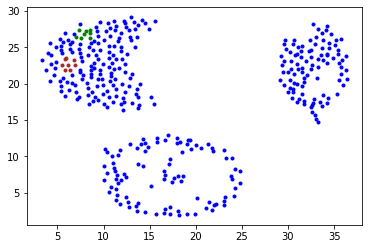

number of cluster found: 2
Counter({0: 348, 6: 44, 10: 40, 4: 24, 9: 20, 5: 16, 3: 11, 11: 10, 1: 8, 2: 8, 8: 8, 12: 8, 13: 8, 15: 8, 14: 7, 7: 5})
number of outliers found: 348

Set eps = 1, Minpoints = 9


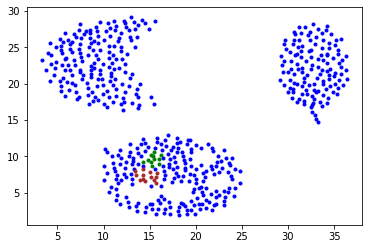

number of cluster found: 2
Counter({0: 496, 3: 17, 4: 17, 2: 13, 1: 11, 5: 10, 6: 9})
number of outliers found: 496

Set eps = 2, Minpoints = 0


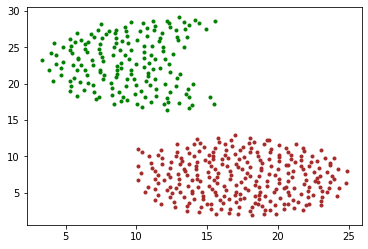

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 2, Minpoints = 1


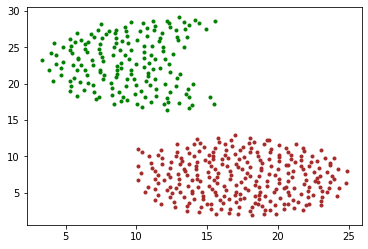

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 2, Minpoints = 2


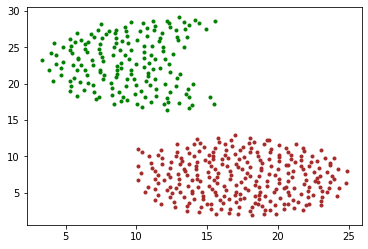

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 2, Minpoints = 3


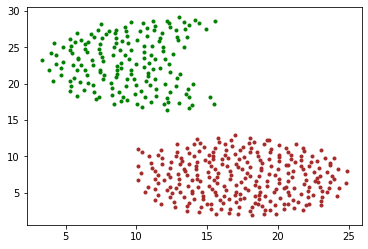

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 2, Minpoints = 4


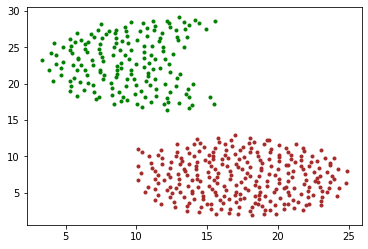

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 2, Minpoints = 5


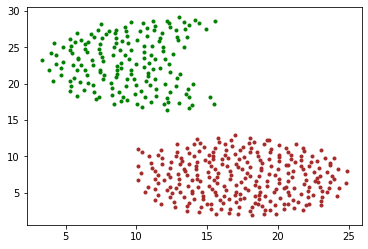

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 2, Minpoints = 6


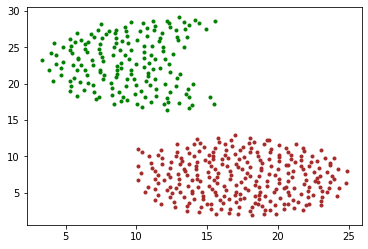

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 2, Minpoints = 7


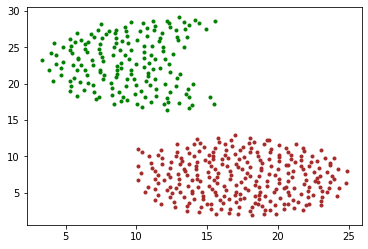

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 2, Minpoints = 8


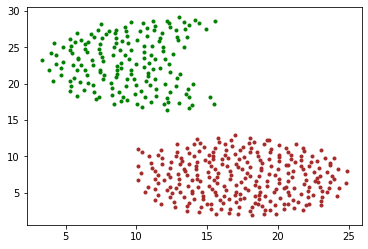

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 2, Minpoints = 9


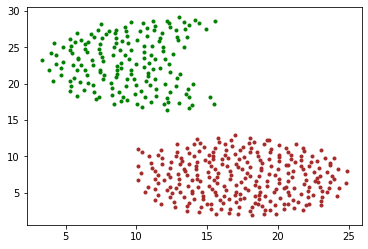

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 0


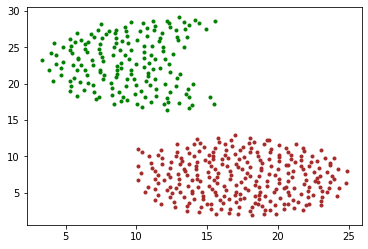

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 1


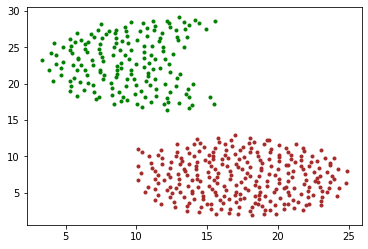

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 2


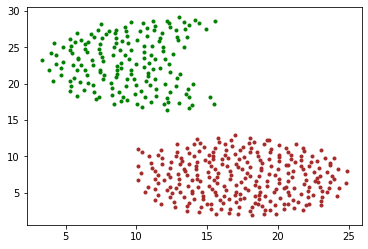

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 3


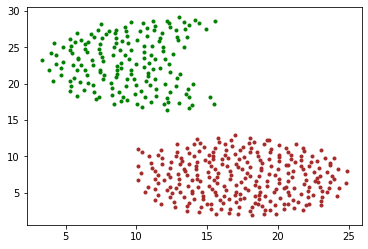

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 4


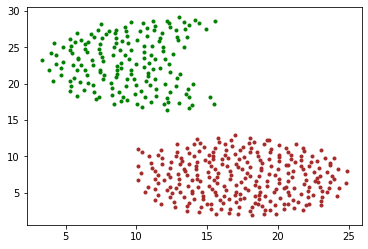

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 5


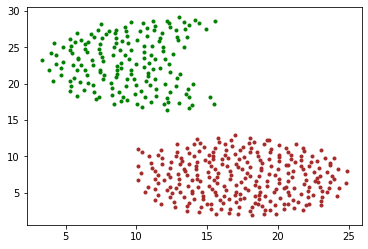

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 6


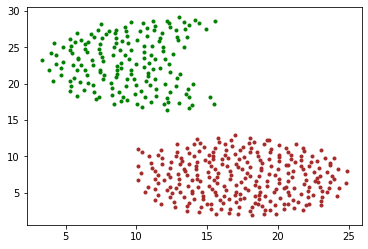

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 7


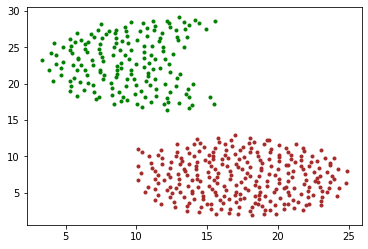

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 8


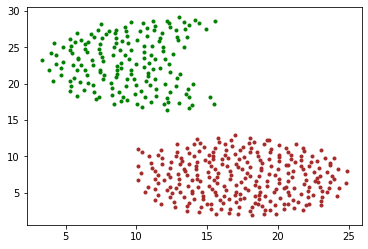

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 3, Minpoints = 9


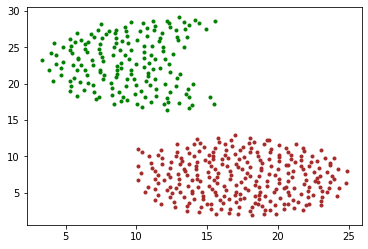

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 0


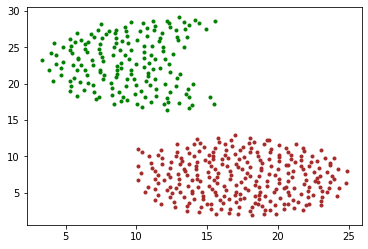

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 1


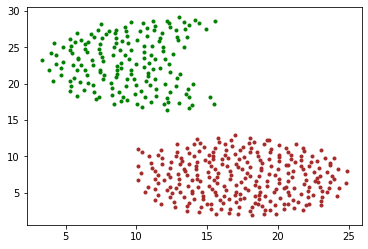

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 2


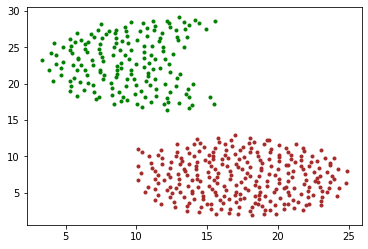

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 3


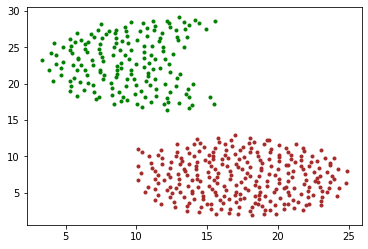

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 4


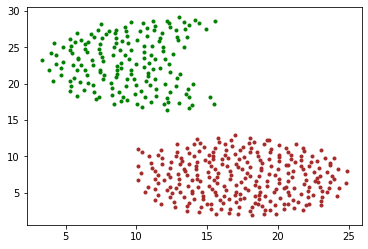

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 5


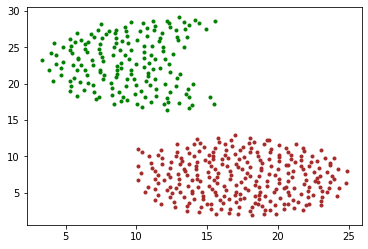

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 6


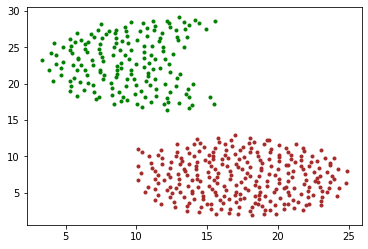

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 7


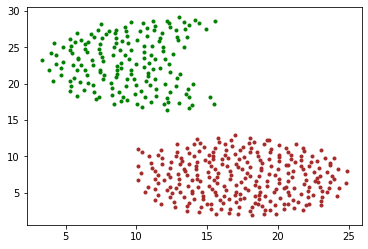

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 8


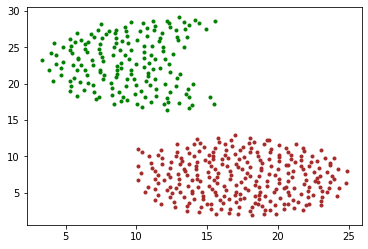

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 4, Minpoints = 9


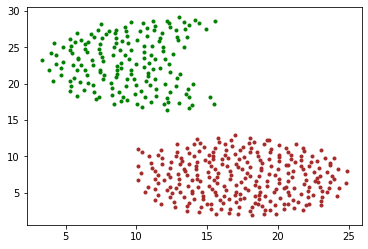

number of cluster found: 2
Counter({2: 273, 1: 170, 3: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 0


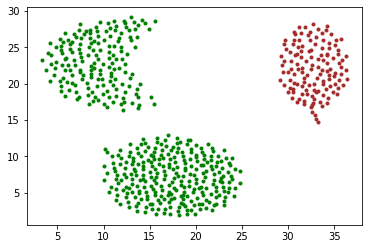

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 1


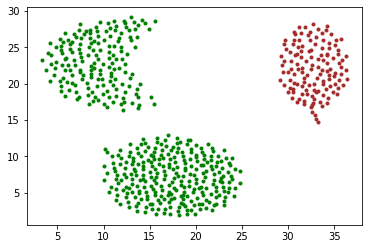

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 2


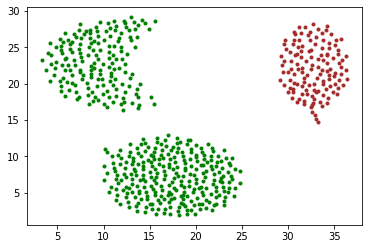

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 3


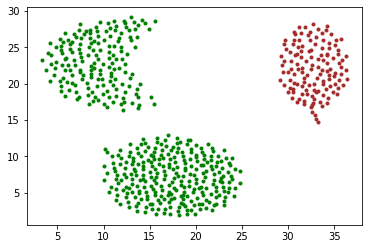

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 4


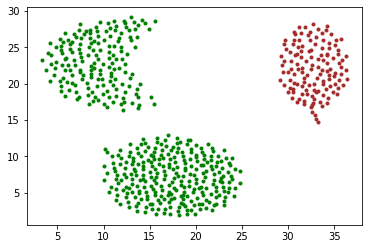

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 5


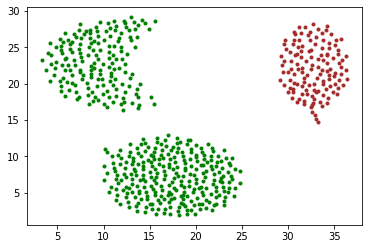

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 6


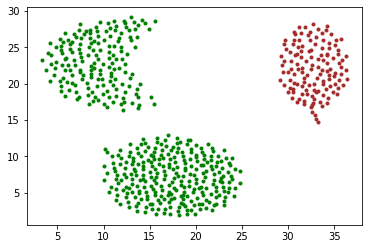

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 7


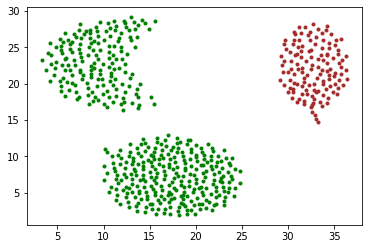

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 8


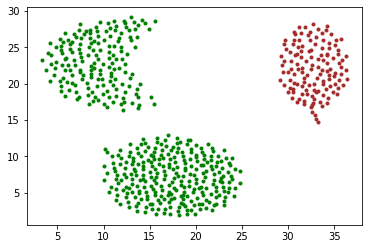

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 5, Minpoints = 9


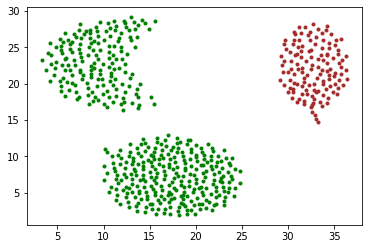

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 0


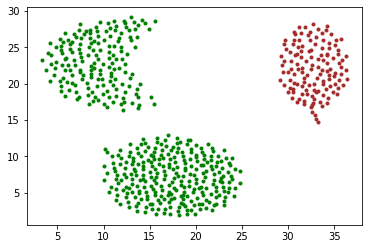

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 1


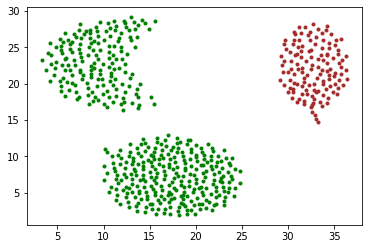

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 2


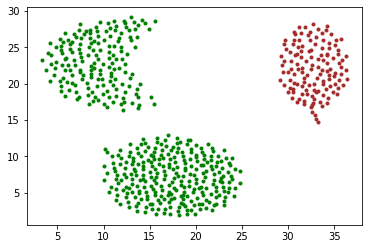

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 3


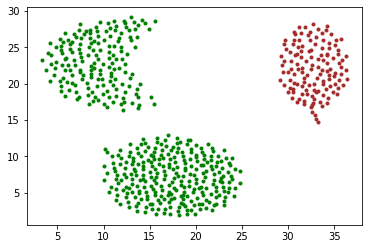

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 4


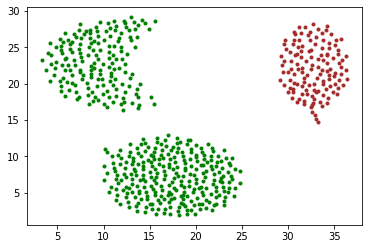

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 5


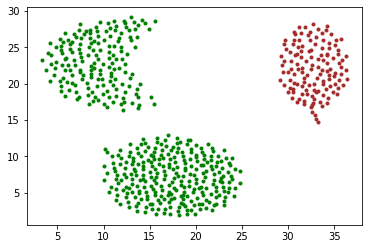

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 6


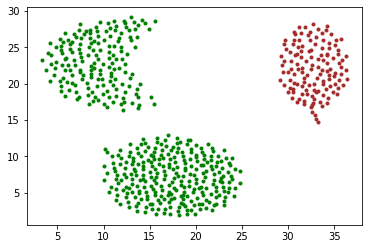

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 7


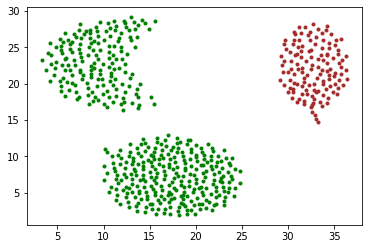

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 8


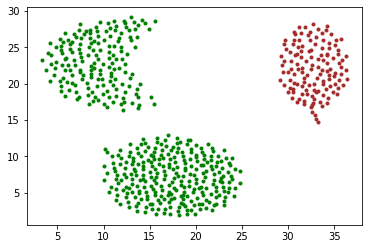

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 6, Minpoints = 9


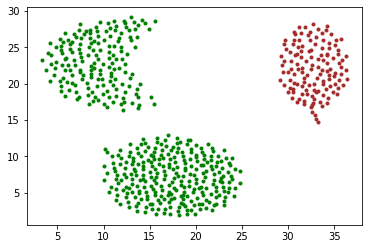

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 0


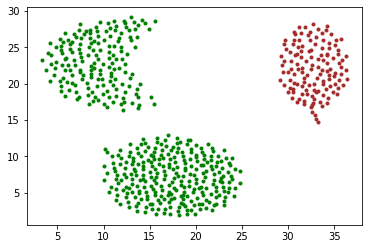

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 1


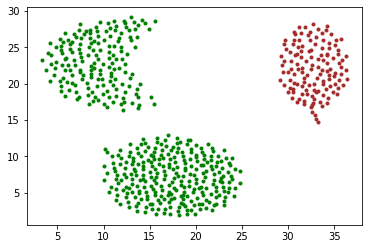

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 2


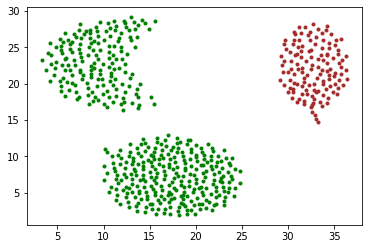

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 3


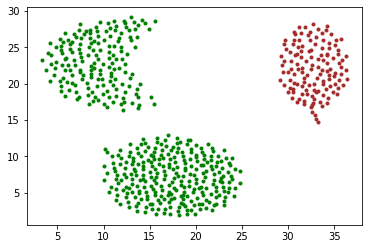

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 4


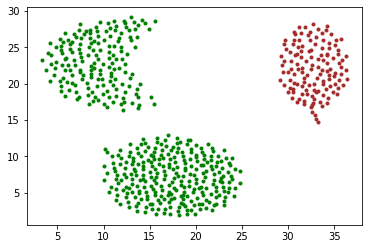

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 5


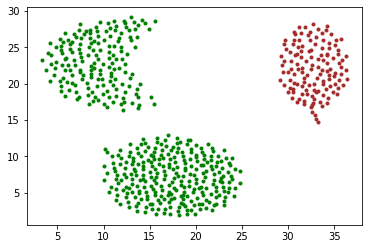

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 6


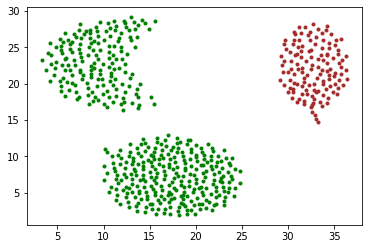

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 7


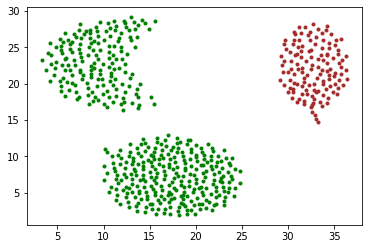

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 8


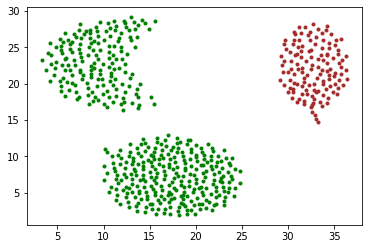

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 7, Minpoints = 9


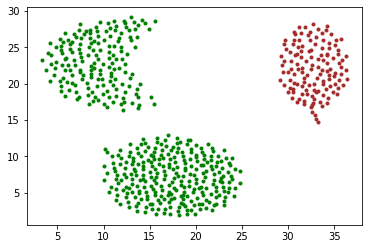

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 0


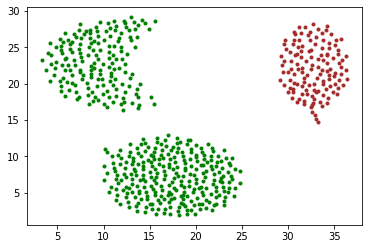

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 1


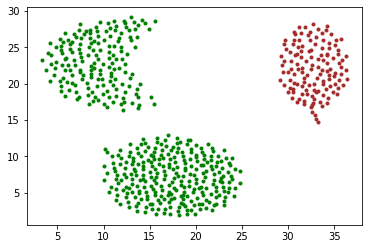

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 2


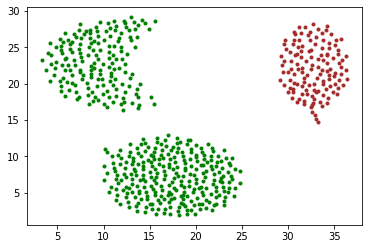

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 3


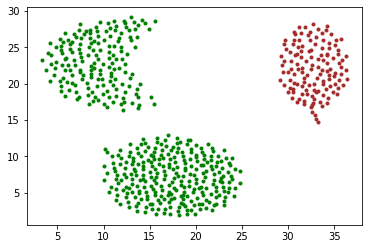

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 4


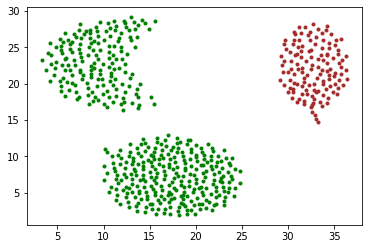

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 5


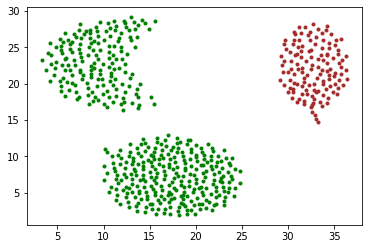

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 6


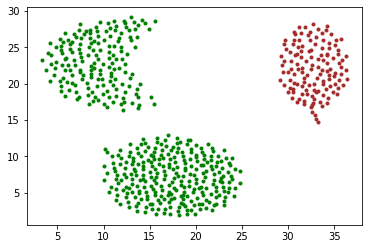

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 7


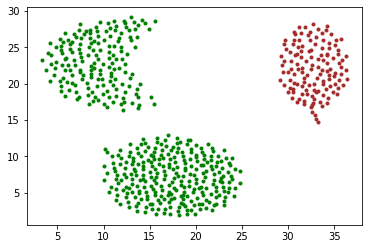

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 8


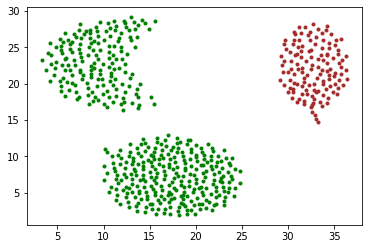

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 8, Minpoints = 9


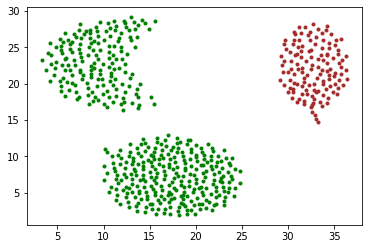

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 0


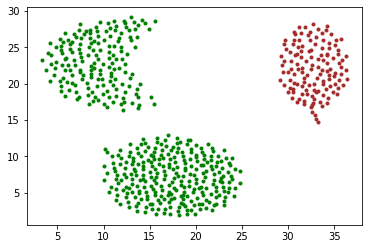

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 1


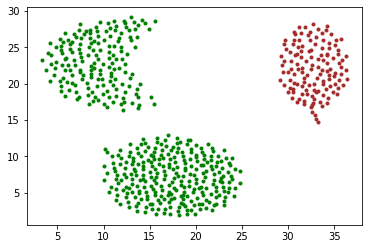

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 2


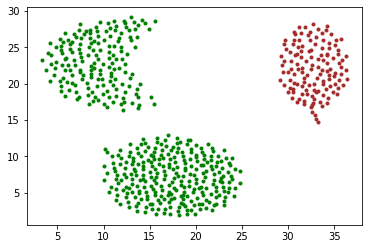

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 3


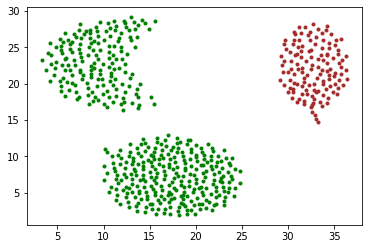

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 4


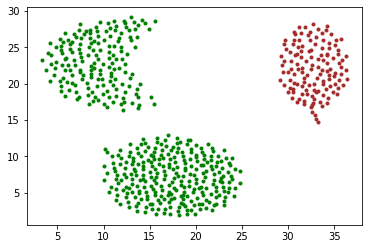

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 5


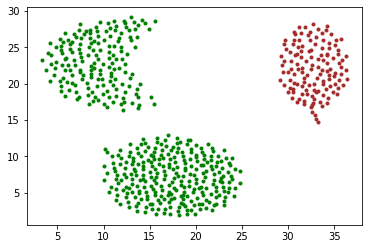

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 6


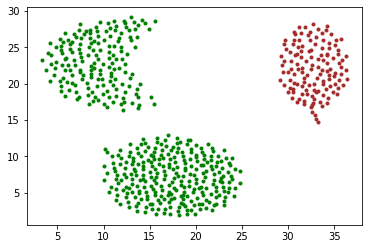

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 7


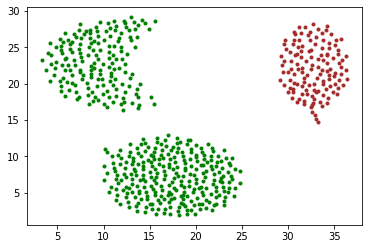

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 8


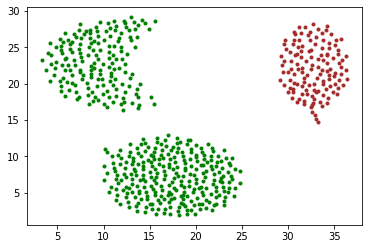

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0

Set eps = 9, Minpoints = 9


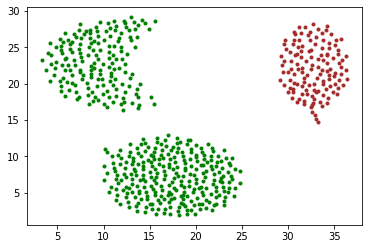

number of cluster found: 2
Counter({1: 443, 2: 130})
number of outliers found: 0



In [87]:
epss = 10
minptss = 10
Points = xy

for eps in range(epss):
    for minpts in range(minptss):
        print('Set eps = ' +str(eps)+ ', Minpoints = '+str(minpts))
        pointlabel,cl = DBScan(Points,eps,minpts)
        plotRes(Points, pointlabel, cl)
        plt.show()
        print('number of cluster found: ' + str(cl-1))
        counter=collections.Counter(pointlabel)
        print(counter)
        outliers  = pointlabel.count(0)
        print('number of outliers found: '+str(outliers) +'\n')